# Biophysics

This notebook will provide a walkthrough on how to interact with the biohysical properties of a cell in a more straightforward manner than [the previous noteobok](02_biophysics.ipynb), as well as how to assess the biological realism of these biophysical parameters.

In [1]:
%matplotlib inline
import Interface as I
from getting_started import getting_started_dir
db_path = I.os.path.join(getting_started_dir, 'example_simulation_data', 'biophysics')
db = I.DataBase(db_path)

# Load example biophysical models
example_models = db['example_models']
# resolve pathname
example_models['morphology.filename'] = [I.os.path.join(
   getting_started_dir, 'anatomical_constraints', e) for e in example_models['morphology.filename']]

trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
[INFO] ISF: Current version: heads/publish+0.g672bbea4.dirty
[INFO] ISF: Current pid: 217474
[INFO] mechanisms: Loading mechanisms:


--No graphics will be displayed.





[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 8.12.3, Interface: heads/publish+0.g672bbea4.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, comm: 0.2.1, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dash: 2.9.3, dask: 2.30.0, dateutil: 2.8.2, deap: 1.3, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, executing: 2.0.1, filelock: 3.0.12, flask: 1.1.2, flask_cors: 4.0.0, frozendict: 2.3.8, fsspec: 0.8.3, future: 0.18.2, gevent: 20.9.0, greenlet: 0.4.17, ipaddress: 1.0, ipykernel: 6.29.0, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, itsdangerous: 1.1.0, jedi: 0.17.1, jinja2: 3.0.3, joblib: 1.3.2, json: 2.0.9, jupyter_client: 8.6.0, jupyter_core: 5.7.1, kazoo: 2.8.0, kiwisolver: 1.3.0, llvmlite: 0.34.0, loggin

Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired
Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired
Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired


In [2]:
# init
objectives_2BAC = [
       '1BAC_APheight', '1BAC_ISI', '1BAC_ahpdepth', '1BAC_caSpike_height', 
       '1BAC_caSpike_width', '1BAC_spikecount', '2BAC_APheight', '2BAC_ISI', 
       '2BAC_ahpdepth', '2BAC_caSpike_height', '2BAC_caSpike_width', '2BAC_spikecount',
        'bAP_APheight', 'bAP_APwidth', 'bAP_att2', 'bAP_att3', 'bAP_spikecount']
params_py3 = [
       'ephys.CaDynamics_E2_v2.apic.decay',
       'ephys.CaDynamics_E2_v2.apic.gamma',
       'ephys.CaDynamics_E2_v2.axon.decay',
       'ephys.CaDynamics_E2_v2.axon.gamma',
       'ephys.CaDynamics_E2_v2.soma.decay',
       'ephys.CaDynamics_E2_v2.soma.gamma',
       'ephys.Ca_HVA.apic.gCa_HVAbar',
       'ephys.Ca_HVA.axon.gCa_HVAbar',
       'ephys.Ca_HVA.soma.gCa_HVAbar',
       'ephys.Ca_LVAst.apic.gCa_LVAstbar',
       'ephys.Ca_LVAst.axon.gCa_LVAstbar',
       'ephys.Ca_LVAst.soma.gCa_LVAstbar',
       'ephys.Im.apic.gImbar',
       'ephys.K_Pst.axon.gK_Pstbar',
       'ephys.K_Pst.soma.gK_Pstbar',
       'ephys.K_Tst.axon.gK_Tstbar',
       'ephys.K_Tst.soma.gK_Tstbar',
       'ephys.NaTa_t.apic.gNaTa_tbar',
       'ephys.NaTa_t.axon.gNaTa_tbar',
       'ephys.NaTa_t.soma.gNaTa_tbar',
       'ephys.Nap_Et2.axon.gNap_Et2bar',
       'ephys.Nap_Et2.soma.gNap_Et2bar',
       'ephys.SK_E2.apic.gSK_E2bar',
       'ephys.SK_E2.axon.gSK_E2bar',
       'ephys.SK_E2.soma.gSK_E2bar',
       'ephys.SKv3_1.apic.gSKv3_1bar',
       'ephys.SKv3_1.apic.offset',
       'ephys.SKv3_1.apic.slope',
       'ephys.SKv3_1.axon.gSKv3_1bar',
       'ephys.SKv3_1.soma.gSKv3_1bar',
       'ephys.none.apic.g_pas',
       'ephys.none.axon.g_pas',
       'ephys.none.dend.g_pas',
       'ephys.none.soma.g_pas',
       'scale_apical.scale']

Let's inspect what these biophysical parameters look like

In [3]:
# get the biophysical parameters of one examplary biophysical model
p = example_models.iloc[0][params_py3]
p

ephys.CaDynamics_E2_v2.apic.decay        59.0477
ephys.CaDynamics_E2_v2.apic.gamma     0.00112918
ephys.CaDynamics_E2_v2.axon.decay        743.739
ephys.CaDynamics_E2_v2.axon.gamma     0.00121861
ephys.CaDynamics_E2_v2.soma.decay        159.292
ephys.CaDynamics_E2_v2.soma.gamma      0.0137903
ephys.Ca_HVA.apic.gCa_HVAbar          0.00376466
ephys.Ca_HVA.axon.gCa_HVAbar         0.000280338
ephys.Ca_HVA.soma.gCa_HVAbar         4.83005e-05
ephys.Ca_LVAst.apic.gCa_LVAstbar        0.194205
ephys.Ca_LVAst.axon.gCa_LVAstbar      0.00674865
ephys.Ca_LVAst.soma.gCa_LVAstbar     5.23378e-06
ephys.Im.apic.gImbar                 0.000758139
ephys.K_Pst.axon.gK_Pstbar              0.367934
ephys.K_Pst.soma.gK_Pstbar            0.00192893
ephys.K_Tst.axon.gK_Tstbar             0.0185365
ephys.K_Tst.soma.gK_Tstbar             0.0831176
ephys.NaTa_t.apic.gNaTa_tbar           0.0185236
ephys.NaTa_t.axon.gNaTa_tbar             3.66734
ephys.NaTa_t.soma.gNaTa_tbar              1.7436
ephys.Nap_Et2.axon.g

Apart from the passive properties, we have 35 biophysical parameters, relating to varying biophysical aspects for the soma, axon (AIS), apical dendrite, and other dendrites (taken to be passive for current injection experiments).

|Name|Meaning|Unit|
|---|---|---|
|ephys.X.\<location\>.gXbar| Density of Hodgkin Huxley-type channel X |[$S/cm^2$]|
|scale_apical.scale|Scaling factor for the diameter of the apical dendrite|None|
|ephys.CaDynamics_E2_v2.\<location\>.gamma| Ratio of free $Ca^{2+}$ | None|
|ephys.CaDynamics_E2_v2.\<location\>.gamma | Time constant of first-order dynamic $Ca^{2+}$-buffering| [$ms$]|
|ephys.SKv3_1.apic.offset/slope|Distribution parameters of $SKv3.1$ channels|[$\mu m$]/None|

## Comparison to empirical ephys responses

How do we know if some set of bipohysical parameters evokes realistic responses? [Hay et al. \(2011\)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107) used a Multi-Objective Optimization Algorithm (MOOA) where these parameters were allowed to vary within in-vivo recorded values (or a generous interval if they are poorly characterized), and the in-vitro response of the cell to $5$ distinct inputs ($bAP$, $BAC$ and $3$ step currents) was characterized and used as an objective.

Here, we provide the same code, but added the parameters:
- `scale_apical.scale`
- `SKv3.1 offset & slope`

In addition to [multi-objective optimization](../../../biophysics_fitting/MOEA_EH_minimal/), one could also perform an [exploration approach](../../../biophysics_fitting/exploration_from_seedpoint/), where you expand outward from a seedpoint, rather than converging on a local minimum. This is expanded upon in [the next notebook](./03_biophysics_degeneracy.ipynb).

In [4]:
db['89']['params']

,min,max
index_new,,
ephys.CaDynamics_E2_v2.apic.decay,20.00000,200.00000
ephys.CaDynamics_E2_v2.apic.gamma,0.00050,0.05000
ephys.CaDynamics_E2_v2.axon.decay,20.00000,1000.00000
ephys.CaDynamics_E2_v2.axon.gamma,0.00050,0.05000
ephys.CaDynamics_E2_v2.soma.decay,20.00000,1000.00000
ephys.CaDynamics_E2_v2.soma.gamma,0.00050,0.05000
ephys.Ca_HVA.apic.gCa_HVAbar,0.00000,0.00500
ephys.Ca_HVA.axon.gCa_HVAbar,0.00000,0.00100
ephys.Ca_HVA.soma.gCa_HVAbar,0.00000,0.00100


### The Simulator

Here, we introduce the [Simulator](../../../biophysics_fitting/simulator.py) object, specific to a particular morphology. We have already saved one in example data, but will guide you through how to set them up yourself. 



A full workflow on how to set up generally looks like:

```python
s = Simulator() # instantiate simulator object
s.setup # Simulator_Setup object, that contains all elements defining the pipeline above
s.setup.cell_param_generator =  example_cell_param_template_generator
s.setup.cell_generator = cell_generator
s.setup.params_modify_funs.append('name_of_param_modify_fun', example_cell_param_modify_function)
s.setup.cell_param_modify_funs.append('name_of_cell_param_modify_fun', example_cell_param_modify_function)
s.setup.cell_modify_funs.append('name_of_cell_modify_fun', example_cell_modify_function)
```

We will provide a minimal working example using only `cell_param_generator` and `params_modify_funs`. You can have a look at the documentation or docstring for what the other methods do

In [49]:
def get_saved_fixed_params(db, key):
    p = db[key]['get_fixed_params'](db[key])
    return p

def get_saved_simulator(db, key):
    s = db[key]['get_Simulator'](db[key])
    return s

To set up a Simulator, you need morphology-specific fixed parameters:

In [50]:
fixed_params = get_saved_fixed_params(db, '89')
fixed_params

{'BAC.hay_measure.recSite': 294.8203371921156,
 'BAC.stim.dist': 294.8203371921156,
 'bAP.hay_measure.recSite1': 294.8203371921156,
 'bAP.hay_measure.recSite2': 474.8203371921156,
 'hot_zone.min_': 384.8203371921156,
 'hot_zone.max_': 584.8203371921156,
 'hot_zone.outsidescale_sections': [23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  40,
  42,
  43,
  44,
  46,
  48,
  50,
  51,
  52,
  54,
  56,
  58,
  60],
 'morphology.filename': '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/getting_started/example_simulation_data/biophysics/89/db/morphology/89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transform_registered_C2.hoc'}

These parameters define recording locations for stimuli, and some celltype-specific variables. In the case of an L5PT, it also defines the "hotzone": a small section of apical dendrite near the bifurcation zone that has a high density of $Ca^{2+}$ channels. Each L5PT morphology also has a free parameter to scale the diameter of the apical dendrite. This is added to the `fixed_params` as an additional modification method:

In [8]:
def scale_apical(cell_param, params):
    assert(len(params) == 1)
    cell_param.cell_modify_functions.scale_apical.scale = params['scale']
    return cell_param

In [8]:
from biophysics_fitting.hay_complete_default_setup_python import get_Simulator
from biophysics_fitting.L5tt_parameter_setup import get_L5tt_template_v2

s = get_Simulator(fixed_params)
s.setup.cell_param_generator = get_L5tt_template_v2
s.setup.cell_param_modify_funs.append(('scale_apical', scale_apical))

We now have a Simulator object with morphology-specific `fixed_params`.

For a Simulator object `s`, the main functions are:

|Method|Output|
|---|---|
|`s.run(params)`| a dictionary with the specified voltagetraces for all stimuli|
|`s.get_simulated_cell(params, stim)`| params and cell object for stimulus stim|
|`s.setup.get(params)`|a cell with set up biophysics|
|`s.setup.get_cell_params(params)`| cell NTParameterSet structure used for the single_cell_parser.create_cell. This is helpful for inspecting, what parameters have effectively been used for the simulation|
|`s.setup.get_cell_params_with_default_sim_prams(params, ...)`| complete neuron parameter filethat can be used for further simulations, i.e. with the simrun module or with roberts scripts.|

#### The $bAP$ stimulus

The $bAP$ stimulus protocol is a step current injection at the soma, strong enough to evoke a backpropagating action potential (bAP)

In [9]:
cell, param = s.get_simulated_cell(p, 'bAP')

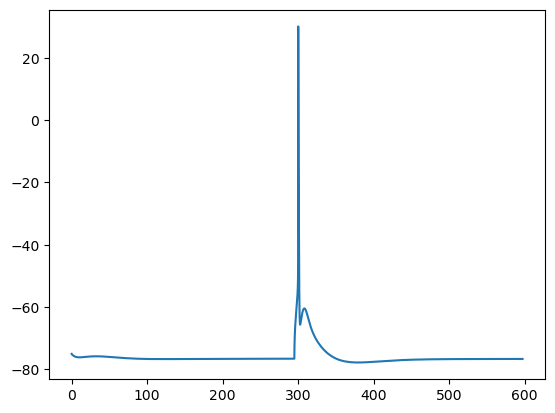

In [10]:
%matplotlib inline
I.plt.plot(cell.tVec, cell.sections[0].recVList[0])

Notice how easy it was to set up this simulation, and to pass bipohysical parameters. [The next notebook](./03_biophysics_degeneracy.ipynb) will make heavy use of this convenience to cycle through various biophysical possibilities.

#### The $BAC$ stimulus protocol

A $BAC$ stimulus is a $bAP$ stimulus, with a well-timed epsp-shaped current injection at the apical dendrite. $BAC$ here stands for $bAP$-activated $Ca^{2+}$-spike

Where exactly do we inject the epsp-shaped apical current? We already saved this information in `fixed_params`. Morphology "89" has a rather deep bifurcation, so the epsp injection is at only $295\mu m$ from the soma.

In [11]:
fixed_params['BAC.stim.dist']

294.8203371921156

In [12]:
cell, p = s.get_simulated_cell(p, 'BAC')

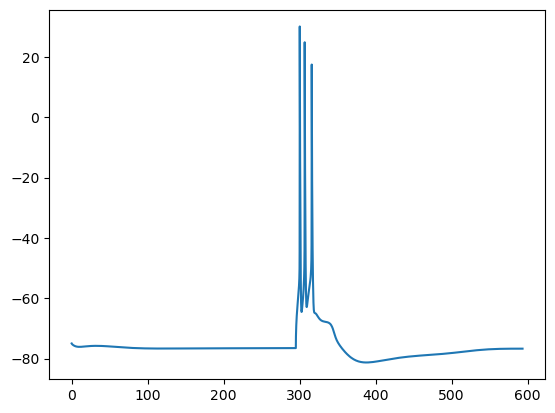

In [13]:
%matplotlib inline
I.plt.plot(cell.tVec, cell.sections[0].recVList[0])

parallelMovieMaker
files are here: animation/animation_0jdx2olv/*.png



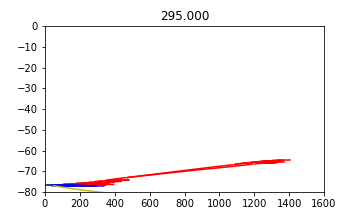
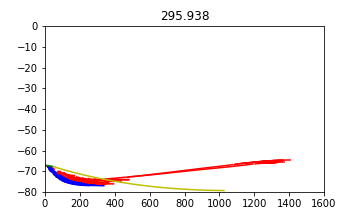
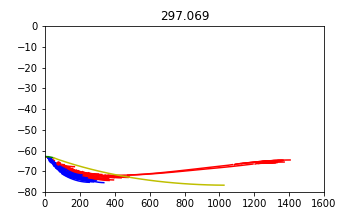
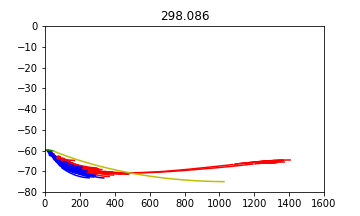
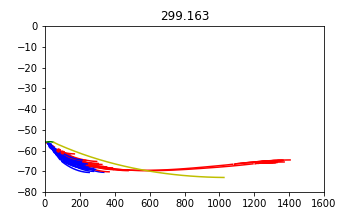
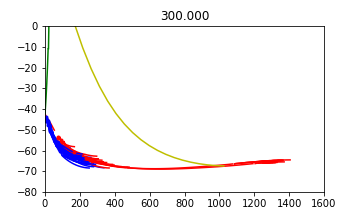
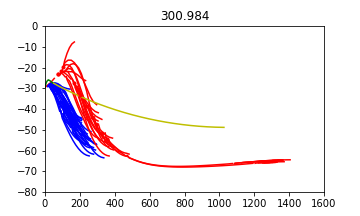
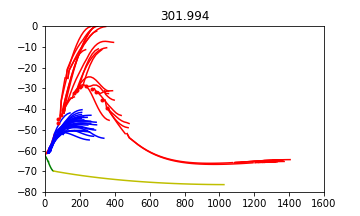
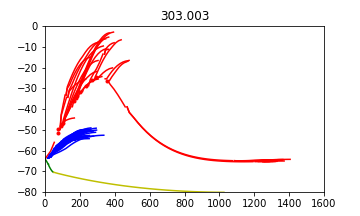
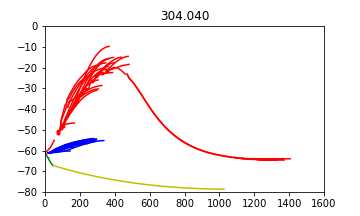
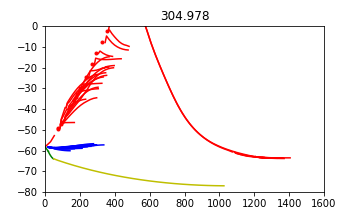
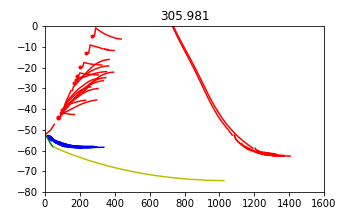
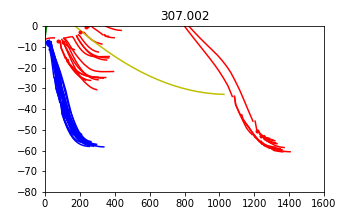
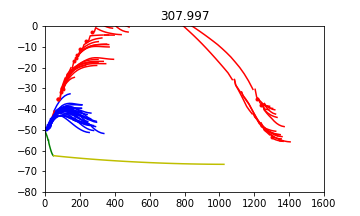
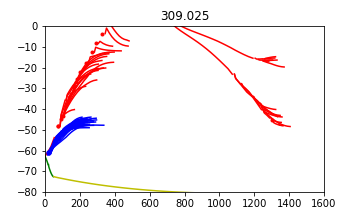
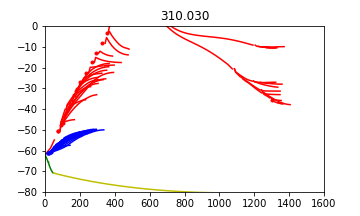
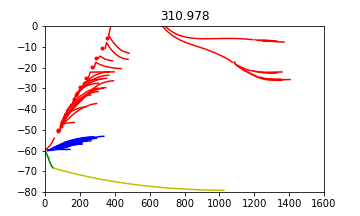
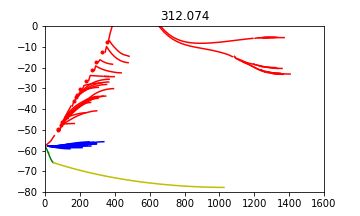
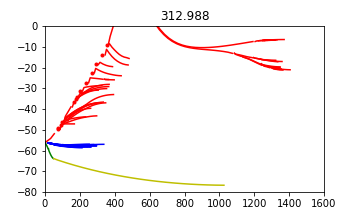
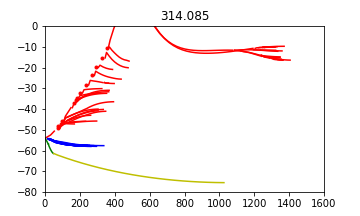
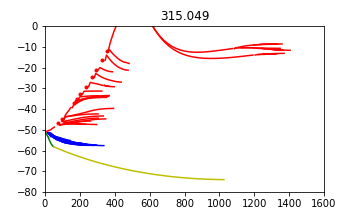
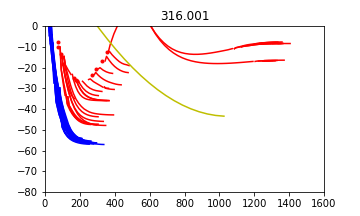
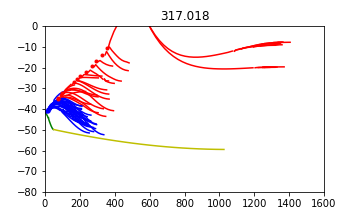
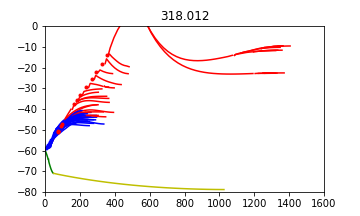
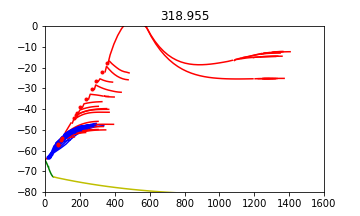
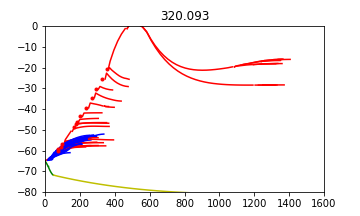
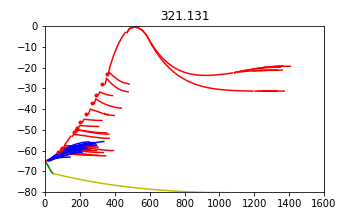
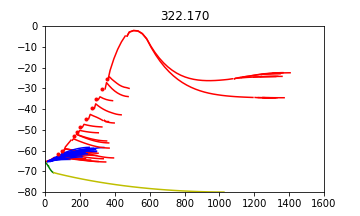
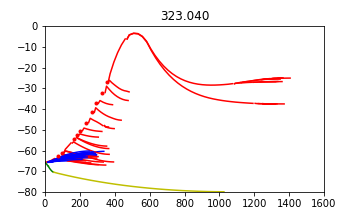
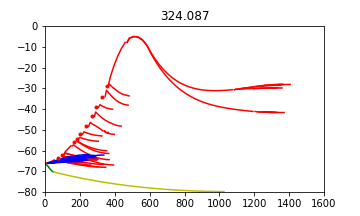
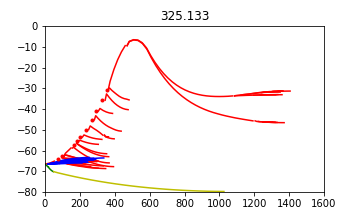
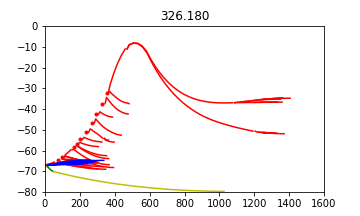
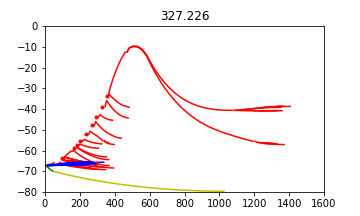
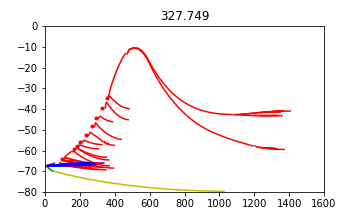
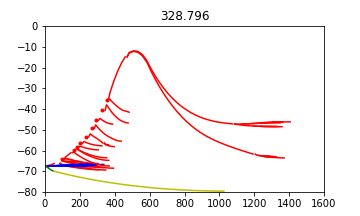
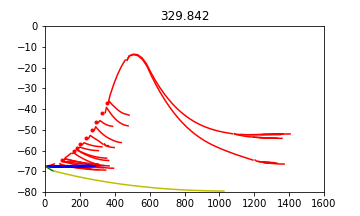
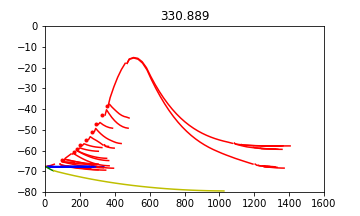
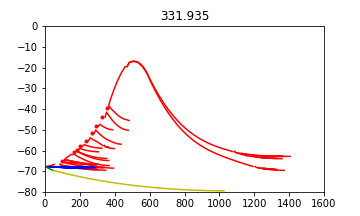
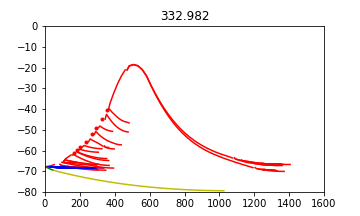
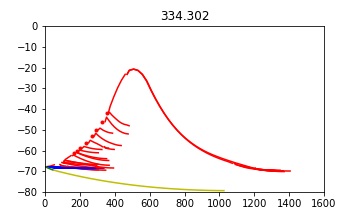
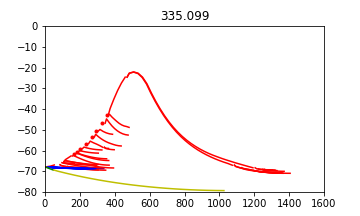
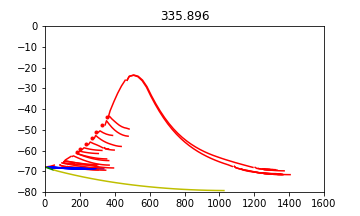
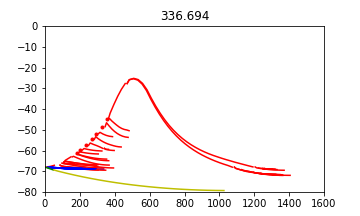
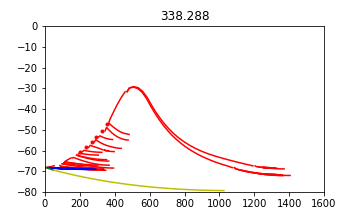
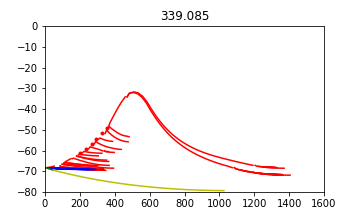
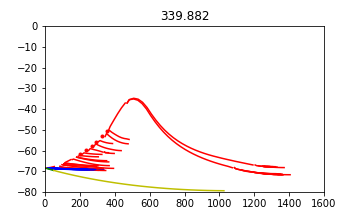
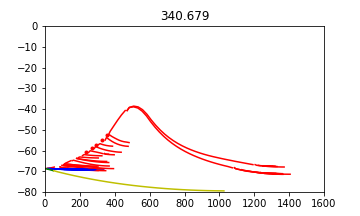
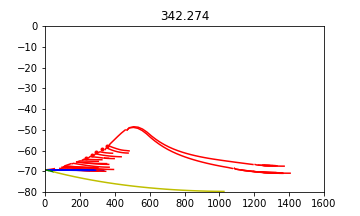
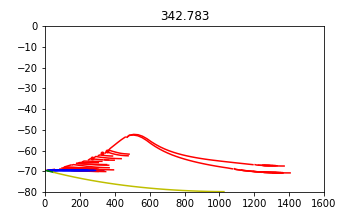
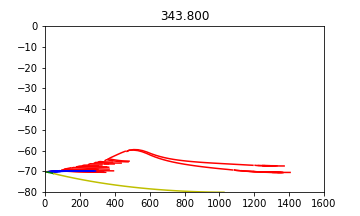
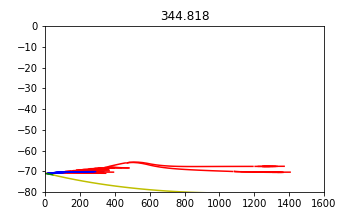
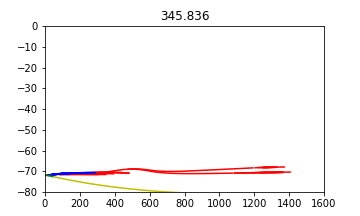
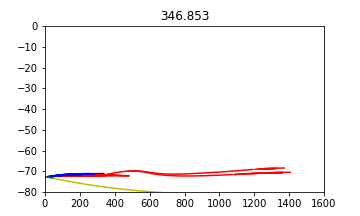
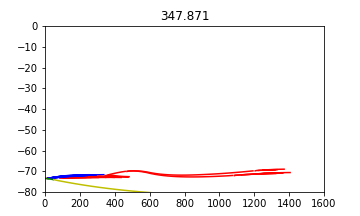
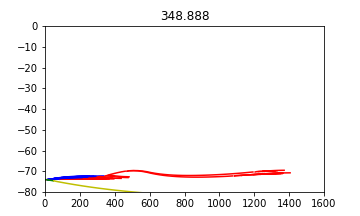

In [14]:
I.cell_to_ipython_animation(
    cell, 
    tstart=295, 
    tend=350, 
    embedded=True)

In [65]:
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer

# # Uncomment to re-create the video
# if I.os.path.exists(str(db.basedir/'visualize_morphology_3d')):
#     I.shutil.rmtree(str(db.basedir/'visualize_morphology_3d'))
output_folder = str(db.basedir/'visualize_morphology_3d')

cmv = CellMorphologyVisualizer(
    cell, 
    t_start=295, t_end=350, t_step=1)
cmv.display_animation(
    output_folder, 
    client=I.get_client(), 
    color="voltage")

AssertionError: Specified t_end exceeds the simulation time of 349.74966433045813 ms

## The [Evaluator](../../../biophysics_fitting/evaluator.py): comparing to empirical responses

[Hay et al. \(2011\)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107) runs 5 stimulus protocols ($bAP$, $BAC$ and $3$ step currents) and compares the cell's response to a distribution of physiological parameters, the so-called **objectives**. Quantifying how far off the responses are compared to this distribution is easily done with the [Evaluator](../biophysics_fitting/evaluator.py) object.

### Running all stimulus protocols

In the previous section, we ran an example bAP stimulus, and a BAC stimulus. This resulted in a single AP, and a triplet respectively. In order to verify if the biophysical properties of the cell match empirically observed responses, we also need to run $3$ step currents and measure the response.

For this, we have a pre-saved Simulator that has thewse step currents set up:

In [51]:
s = get_saved_simulator(db, '89')

In [53]:
# may take a while, especially the step currents
voltage_traces = s.run(
    params=p
)

`voltage_traces` is a dictionary with the voltage trace (i.e. NEURON's `tVec` and `vList`) of the cell for each stimulus protocol.

In [54]:
voltage_traces.keys()

dict_keys(['bAP.hay_measure', 'BAC.hay_measure', 'StepOne.hay_measure', 'StepTwo.hay_measure', 'StepThree.hay_measure'])

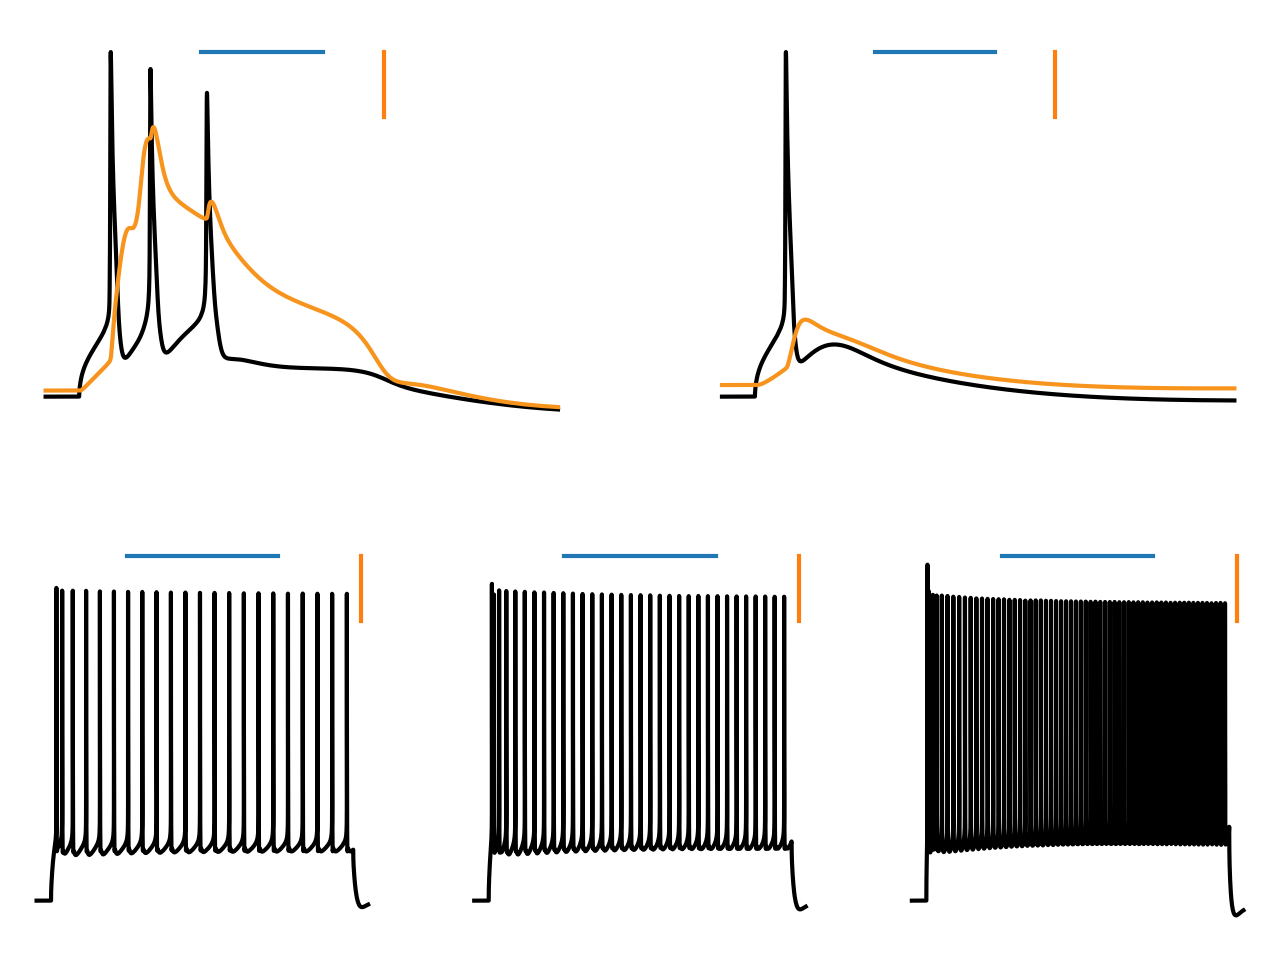

In [55]:
# visualize all responses
from visualize import voltage_trace_visualizer as vtv
vtv.visualize_vt(voltage_traces)

These responses *look* good, but *looking* is not a great quantifier. Let's see how far off these responses are compared to the empirically recored ones.

In [56]:
def get_evaluator(db, key):
    s = db[key]['get_Evaluator'](db[key])
    return s
e = get_evaluator(db, '89')

In [66]:
evaluation = e.evaluate(voltage_traces)
evaluation

{'1BAC_APheight.check_1AP': 'True',
 '1BAC_APheight.raw': array([30.07045168, 24.69862494, 17.31502358]),
 '1BAC_APheight.normalized': 0.8704535439809831,
 '1BAC_APheight': 0.8704535439809831,
 '1BAC_ISI.check_2_or_3_APs': 'True',
 '1BAC_ISI.check_repolarization': 'True',
 '1BAC_ISI.raw': 7.875,
 '1BAC_ISI.normalized': 2.3787718680286485,
 '1BAC_ISI': 2.3787718680286485,
 '1BAC_ahpdepth.check_2AP': 'True',
 '1BAC_ahpdepth.raw': array([-64.55682338, -62.92942987]),
 '1BAC_ahpdepth.normalized': 0.3142183430292249,
 '1BAC_ahpdepth': 0.3142183430292249,
 '1BAC_caSpike_height.check_1_Ca_AP': 'True',
 '1BAC_caSpike_height.check_>=2_Na_AP': 'True',
 '1BAC_caSpike_height.check_ca_max_after_nth_somatic_spike': 'True',
 '1BAC_caSpike_height.raw': 6.8499314037744545,
 '1BAC_caSpike_height.normalized': 0.04721708810017878,
 '1BAC_caSpike_height': 0.04721708810017878,
 '1BAC_caSpike_width.check_1_Ca_AP': 'True',
 '1BAC_caSpike_width.raw': 38.825000000000045,
 '1BAC_caSpike_width.normalized': 1.0984

`evaluation` contains a lot of information. Most are self-explanatory, but not all, so here is a small overview.

|Suffix|Meaning|
|---|---|
|`.check`|Check if certain conditions are met before moving on to evaluation. E.g., it does not make sense to measure the AP height of the second AP during the BAC stimulus, if there is no burst firing at all.|
|`.raw`|The measured values for all objectives are saved under `.raw` variables. If multiple values exists for some objective, then this `.raw` value will be an array, but the mean is taken for further evaluation.
|`.normalized`|Scales objective between $0$ and $1$.|
|No suffix|The objective in units of $\mu \pm \sigma$ compared to the distribution of empirically recorded ones.

The step current objectives have some cryptic acronyms as well:

|Acronym|Meaning|
|---|---|
|`mf`|Spike frequency|
|`AI` |Adaptation Index|
|`ISIcv`|Interspike Interval Coefficient of Variation|
|`DI`|Initial burst ISI|
|`TTFS`|First spike latency|
|`APh`|AP peak|
|`fAHPd` |Fast AHP Depth|
|`sAHPd` |Slow AHP Depth|
|`sAHPt` |Slow AHP Time|
|`APw` |AP half-width|


The objectives for the step current are allowed to deviate $4.5 \sigma$ from the mean, while the other ones can deviate $3 \sigma$.

Let's clean up this data a bit and plot out their deviation from the mean.

In [59]:
# only plot out sigma from mean, not raw or normalized values - also no checks.
filtered_evaluation = {k: v for k, v in evaluation.items() if \
    not k.endswith('.raw') and \
    not k.endswith('.normalized') and \
    not 'check' in k and \
    not k.endswith('err') and\
    not "1BAC" in k}
filtered_evaluation

{'2BAC_APheight': 1.099123921122972,
 '2BAC_ISI': 0.5001761183515386,
 '2BAC_ahpdepth': 0.36057819063741015,
 '2BAC_caSpike_height': 0.26912469771585656,
 '2BAC_caSpike_width': 1.2047244094487919,
 '2BAC_spikecount': 0.0,
 'bAP_APheight': 1.014689207204846,
 'bAP_APwidth': 2.1499999999999773,
 'bAP_att2': 1.2964832826175816,
 'bAP_att3': 1.6880290568476148,
 'bAP_spikecount': 0.0,
 'mf1': 2.272727272727273,
 'AI1': 0.5470417010339672,
 'ISIcv1': 1.711783660296528,
 'DI1': 0.5839307048984489,
 'TTFS1': 1.072404371584687,
 'APh1': 1.5097914872423135,
 'fAHPd1': 1.592458895576486,
 'sAHPd1': 0.8013726551735361,
 'sAHPt1': 0.15009256716961503,
 'APw1': 2.387223587223688,
 'mf2': 3.571428571428571,
 'AI2': 1.3985074814280334,
 'ISIcv2': 0.3262396900716158,
 'DI2': 0.7947976878612717,
 'TTFS2': 0.26333789329686297,
 'APh2': 0.26321824844527736,
 'fAHPd2': 1.1635633688579987,
 'sAHPd2': 0.12624298383585592,
 'sAHPt2': 1.175848305723831,
 'APw2': 1.646670717018985,
 'mf3': 4.050040500405004,
 

In [60]:
def translate_objective(objective):
    """
    A simple map between objective acronyms and their full name
    """
    step_map = {
        'mf': "Spike frequency",
        'AI': 'Adaptation Index',
        'ISIcv': "Interspike Interval \n Coefficient of Variation",
        'DI': "Initial burst ISI",
        'TTFS': "First spike latency",
        'APh': "AP peak",
        'fAHPd': "Fast AHP Depth",
        'sAHPd': "Slow AHP Depth",
        'sAHPt': "Slow AHP Time",
        'APw': "AP half-width",
    }
    if not "bAP" in objective and not "BAC" in objective:
        # must be step current objective
        t = step_map[objective[:-1]]
    else:
        t = objective
    return t

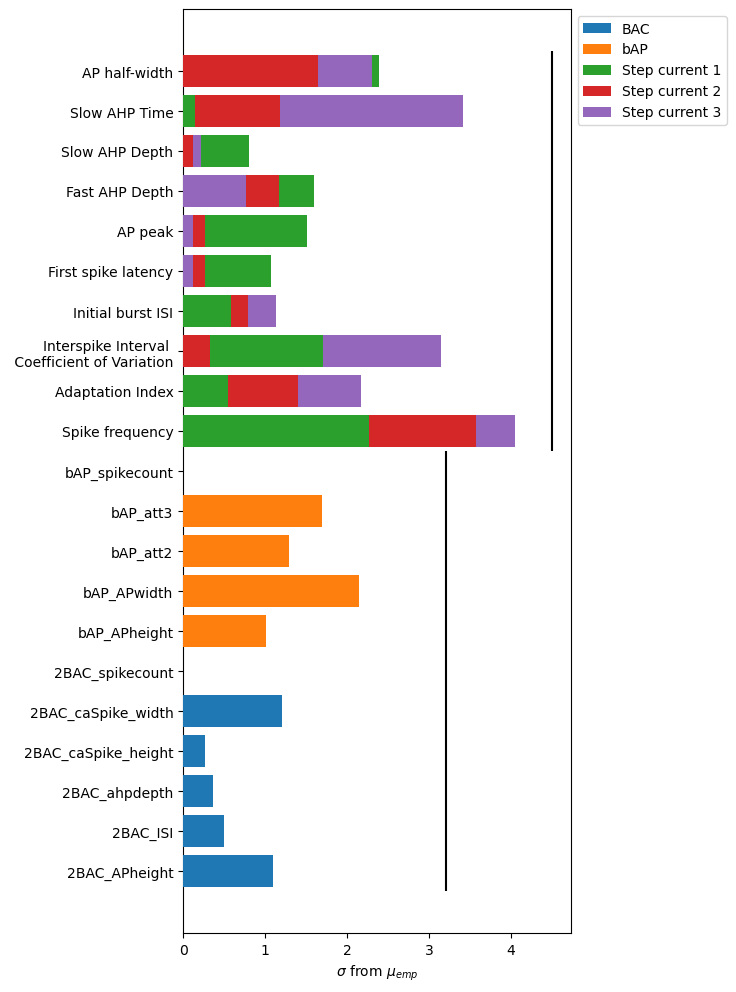

In [61]:
%matplotlib inline
from collections import OrderedDict
colors = I.plt.rcParams['axes.prop_cycle'].by_key()['color']
fig = I.plt.figure(figsize=(5, 12))
ax = fig.gca()
for k, v in filtered_evaluation.items():
    if "BAC" in k:
        label="BAC"
        c = colors[0]
    elif 'bAP' in k:
        label = "bAP"
        c = colors[1]
    else:
        label = "Step current {}".format(k[-1])
        c = colors[int(k[-1])+1]
    ax.barh(y=translate_objective(k), width=v, zorder=5-v, label=label, color=c)
handles, labels = I.plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
I.plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 1))
I.plt.xlabel("$\sigma$ from $\mu_{emp}$")
I.plt.vlines([3.2], ymin=-0.5, ymax=10.5, color='k')  # first 10 objectives: bAP and BAC
I.plt.vlines([4.5], ymin=10.5, ymax=20.5, color='k')  # next 10 objectives: step currents
I.plt.show()

All objectives are well within the pre-defined bounds. most are even under $2 \sigma$ from the mean!

## Visualization

How much did current ended up flowing through the ion channels? Let's plot out a spatial integration of all the current types in the apical dendrite:

In [62]:
rangeVarsApical = [
 'NaTa_t.ina',
 'Ca_HVA.ica',
 'Ca_LVAst.ica',
 'SKv3_1.ik',
 'SK_E2.ik',
 'Ih.ihcn',
 'Im.ik']
for rv in rangeVarsApical:
    cell.record_range_var(rv)

In [63]:
sim_params = I.scp.NTParameterSet({
    'tStart': 0.0,
    'tStop': 295+55,
    'dt': 0.025,
    'Vinit': -75.0,
    'T': 34.0,
    'recordingSites': []})
I.scp.init_neuron_run(sim_params, vardt = True)

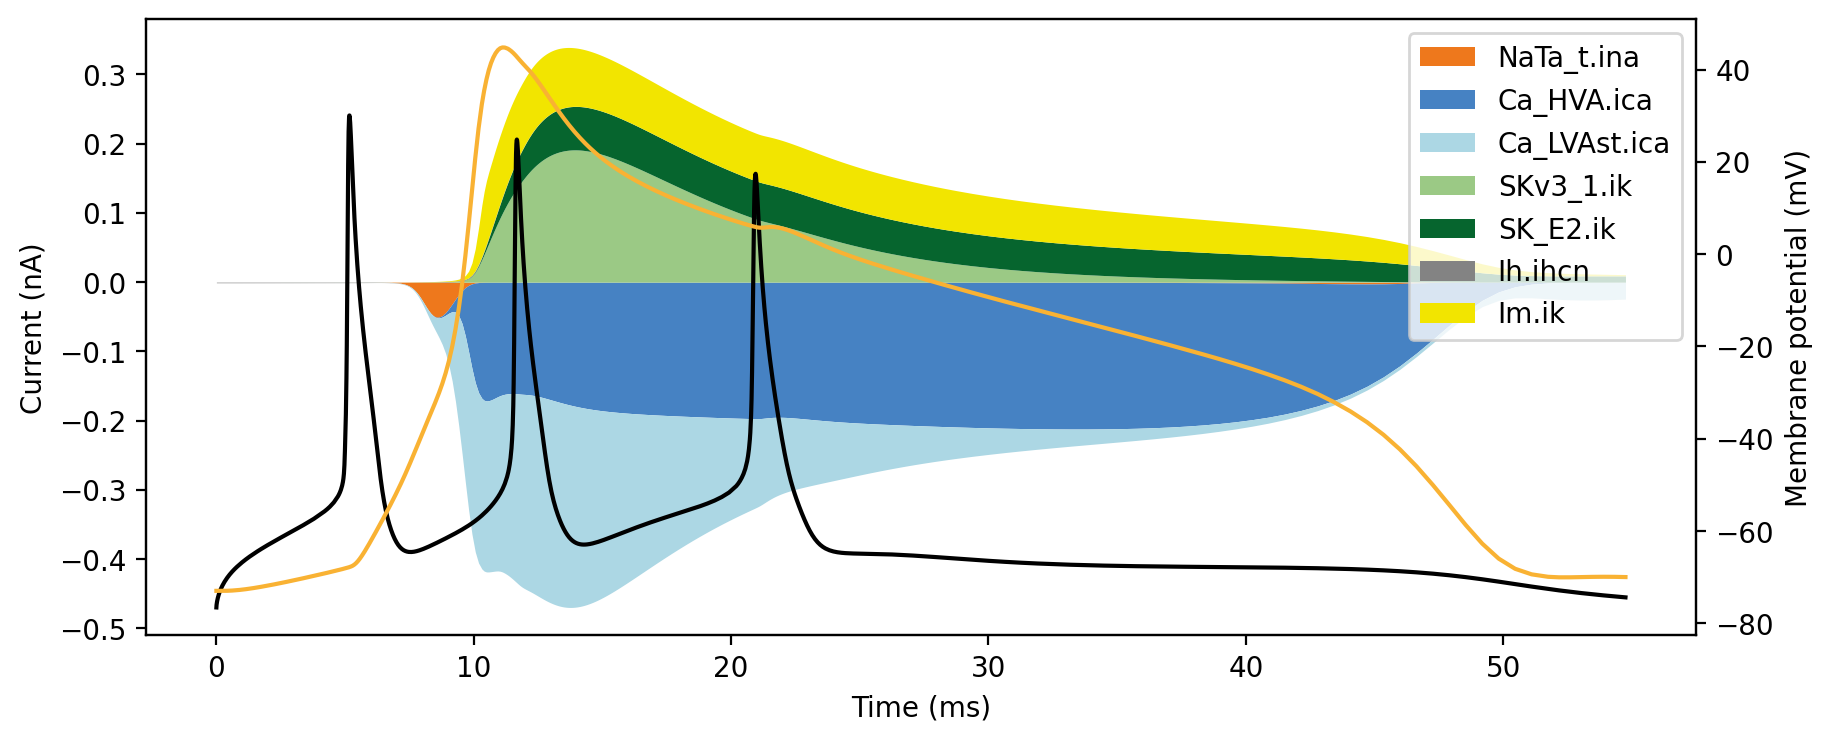

In [72]:
from visualize.current_visualizer import CurrentAnalysis
ca = CurrentAnalysis(cell, rangeVars = rangeVarsApical)
ca.plot_areas(plot_voltage = True, t_stim=295, select_window_relative_to_stim=(0,700))

The black and orange line denote membrane voltage at the soma and dendritic recording location respectively. The filled in areas are a spatial sum of ionic current: $\sum_{dendrites} I_{ion}$